# Agglomerative Clustering

Welcome! This workshop is from [TrainingDataScience.com](https://trainingdatascience.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual). Sign up to receive more free workshops, training and videos.

Clustering is an unsupervised task. In other words, we don't have any labels or targets. This is common when you receive questions like "what can we do with this data?" or "can you tell me the characteristics of this data?".

There are quite a few different ways of performing clustering, but one way is to form clusters hierarchically. You can form a hierarchy in two ways: start from the top and split, or start from the bottom and merge.

In this workshop we're going to look at the latter, which is called _agglomerative clustering_.

Hierarchical techniques are really useful when you can assert that there is some natural tendency to build a heirarchy in your domain. For example, if you profiling people that use your application, then you might find that people tend to form a heirarchy.

In [1]:
# Usual imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

## Data

We'll be using the by now familiar `iris` dataset again for this, because it has a natural
hierarchy.

In [2]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
y_name = ['Setosa', 'Versicolour', 'Virginica']

## Agglomerative clustering

Remember agglomerative clustering is the act of forming clusters from the bottom up.

We start with single observations as clusters, then iteratively assign them to the nearest
cluster.

Eventually we end up with a number of clusters (which need to be specified in advance).

Let's stick to "ward" linkage to define how to merge the clusters; it generally works
pretty well.

In [3]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(X);

And again, let's plot the data.

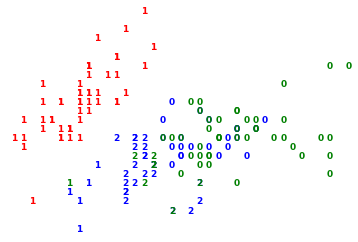

In [4]:
# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(X)

colours = 'rbg'
for i in range(X.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]), 
             color=colours[y[i]], 
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In this plot, the numbers denote which cluster each observation has been assigned to.

The colours denote the original class.

I think you will agree that the clustering has done a pretty decent job and there are
a few outliers.

###Â Tasks

- Try altering the number of clusters to 1, 3, others....

# Dendrograms

Dendrograms are hierarchical plots of clusters where the length of the bars represent the distance to the next cluster centre.

We can lean on our other general purpose data science library `scipy` to provide us with a method to plots dendrograms. Unfortunately we also have to use `scipy`s linkage methods, rather than `sklearn`s because of some expected parameters.

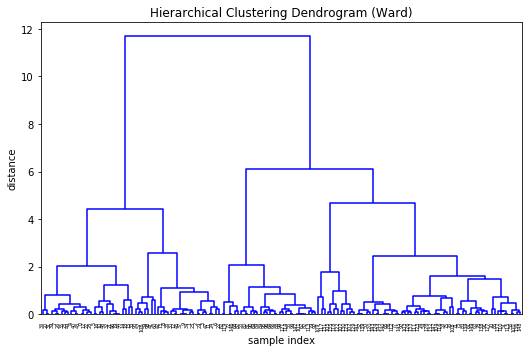

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

Wooohey that's a lot of legs. Let's cut a few off to be able to take a better look at the data...

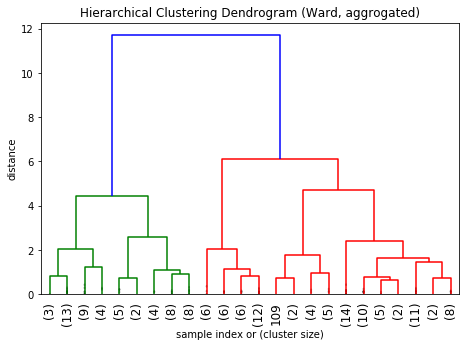

In [6]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

Much better.

### Tasks:

- Try playing with the different parameters in the dendrogram. Look up the [aggomerative documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).
  - p
  - truncate_mode

Ok, now we've honed our artistic skills, let's put them to the test in the whiskey data set.

## Another look at the whiskey dataset

Let's load it in again.

In [7]:
whiskey = pd.read_csv('https://s3.eu-west-2.amazonaws.com/free.trainingdatascience.com/data/whiskies.csv')
cols = ['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco',
       'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']
X = whiskey[cols]
y = whiskey['Distillery']
display(X.head())
display(y.head())

Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  Winey  Nutty  \
0     2          2      2          0        0      2      1      2      2   
1     3          3      1          0        0      4      3      2      2   
2     1          3      2          0        0      2      0      0      2   
3     4          1      4          4        0      0      2      0      1   
4     2          2      2          0        0      1      1      1      2   

   Malty  Fruity  Floral  
0      2       2       2  
1      3       3       2  
2      2       3       2  
3      2       1       0  
4      3       1       1

0    Aberfeldy
1     Aberlour
2       AnCnoc
3       Ardbeg
4      Ardmore
Name: Distillery, dtype: object

### Tasks:

- Plot a dendrogram of the whiskey data
- Beginners: Pick a whiskey from each main category (manually)
- Advanced: Write an algorithm to pick a single whiskey from each main whiskey group, using only the data (truncate the data then pick observations from the `AgglomerativeClustering.children_` field)